In [1]:

import warnings

import matplotlib.pyplot as plt
# import MultiTrade
import numpy as np
import pandas as pd
from IPython.display import display
from neuralforecast.core import NeuralForecast

from neuralforecast.auto import AutoBiTCN, AutoNBEATS, AutoTFT
from neuralforecast.losses.pytorch import RMSE

# from statsforecast import StatsForecast

from utils.utils import build_market_image,train_test_split_data,plot_insample_forecasts
from configs import defaults
import datetime
warnings.filterwarnings("ignore")

In [2]:
COIN_PAIRS=defaults.COIN_PAIRS
target_pair=defaults.target_pair
time_frame=defaults.time_frame
DATA_DIR=defaults.DATA_DIR

In [3]:

horizon = 7
context_length=5*horizon
split_n_days=30
round_time='H'
id_col='symbol'
save_path=defaults.forecasting_model_path

In [4]:

data=build_market_image(target_pair=target_pair,time_frame=time_frame,axis=0,data_dir=DATA_DIR,only_target=True)
# data.index

train_data,test_data=train_test_split_data(data=data,n_days=30)

# data['symbol'].unique()

# test_data
data

['data/binanceus-DOGEUSDT-1h.pkl']


100%|██████████| 78/78 [00:00<00:00, 11079.51it/s]
1it [00:00, 11.96it/s]

2024-10-22 10:00:00 2024-11-21 10:00:00


,open,high,low,close,volume,y,feature_hour_of_day,feature_day_of_week,feature_day_of_month,feature_day_of_year,feature_BBANDS_BB_UPPER,feature_BBANDS_BB_MIDDLE,feature_BBANDS_BB_LOWER,feature_MACD_MACD,feature_MACD_SIGNAL,feature_14_period_RSI,feature_14_period_STOCH_%K,ds,unique_id,symbol
date_close,,,,,,,,,,,,,,,,,,,,
2024-01-01 10:00:00,0.08975,0.08976,0.08975,0.08976,6209.0,0.08976,-0.065217,-0.5,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-01-01 10:00:00,25,DOGEUSDT
2024-01-01 11:00:00,0.08977,0.09012,0.08972,0.09012,13750.0,0.09012,-0.021739,-0.5,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000008,0.000004,100.000000,0.000000,2024-01-01 11:00:00,25,DOGEUSDT
2024-01-01 12:00:00,0.09008,0.09008,0.08992,0.08992,583.0,0.08992,0.021739,-0.5,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000004,0.000004,62.566845,0.000000,2024-01-01 12:00:00,25,DOGEUSDT
2024-01-01 13:00:00,0.08995,0.09046,0.08995,0.09040,12750.0,0.09040,0.065217,-0.5,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000020,0.000009,80.974284,0.000000,2024-01-01 13:00:00,25,DOGEUSDT
2024-01-01 14:00:00,0.09018,0.09053,0.09018,0.09053,5594.0,0.09053,0.108696,-0.5,-0.500000,-0.500000,0.000000,0.000000,0.000000,0.000033,0.000016,83.360761,0.000000,2024-01-01 14:00:00,25,DOGEUSDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-17 15:00:00,0.36347,0.36425,0.35770,0.36143,223141.0,0.36143,0.152174,0.5,0.033333,0.379452,0.374743,0.361372,0.348002,-0.001727,-0.002703,47.544678,60.921502,2024-11-17 15:00:00,25,DOGEUSDT
2024-11-17 16:00:00,0.36137,0.36550,0.35834,0.36372,137563.0,0.36372,0.195652,0.5,0.033333,0.379452,0.373451,0.360964,0.348477,-0.001471,-0.002457,49.746258,67.434585,2024-11-17 16:00:00,25,DOGEUSDT
2024-11-17 17:00:00,0.36445,0.36762,0.36062,0.36762,196547.0,0.36762,0.239130,0.5,0.033333,0.379452,0.373621,0.361020,0.348419,-0.000942,-0.002154,53.338130,74.415452,2024-11-17 17:00:00,25,DOGEUSDT


In [5]:
model=NeuralForecast.load(save_path)

Seed set to 16
Seed set to 19


In [6]:
model.dataset, model.uids, model.last_dates, model.ds = model._prepare_fit(
                df=test_data,
                static_df=None,
                sort_df=model.sort_df,
                predict_only=True,
                id_col=model.id_col,
                time_col=model.time_col,
                target_col=model.target_col,
            )


In [7]:
test_pred_insample = model.predict_insample(step_size=horizon)


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

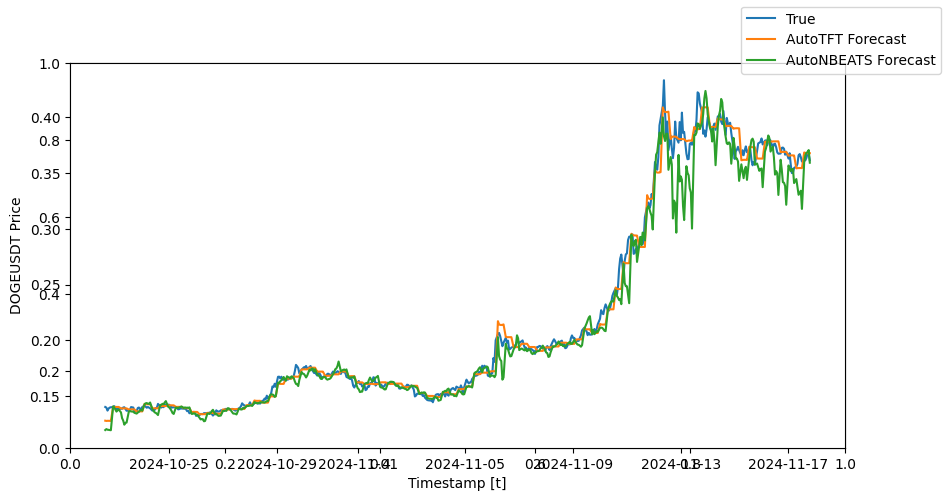

In [8]:
plot_insample_forecasts(test_pred_insample)


In [9]:
test_data['close']=test_data['y'].copy()


In [10]:
idx,cut_data=next(iter(test_pred_insample.groupby(['cutoff','symbol'])))
def flatten_preds(idx,cut_data):
    t_off_pred,symb=idx
    pred_cols=cut_data.filter(like='Auto').columns
    cut_data['mean_pred']=cut_data[pred_cols].mean(axis=1)
    cut_data=cut_data.drop(pred_cols,axis=1)
    t_cut=cut_data.T

    t_cut=t_cut.drop('cutoff')
    t_cut=t_cut.drop('ds')
    t_cut=t_cut.drop('y')
    # print(t_cut)
    h_cols=[f'H{i}' for i in range(horizon-1)]
    # print (h_cols)
    t_cut.columns=h_cols


    flat_cols=[f'feature_{model}_{horizon}' for model in t_cut.index for horizon in t_cut.columns]
    pred_values=t_cut.values.flatten()

    flat_df=pd.DataFrame([pred_values],columns=flat_cols)
    id_cols=['ds','symbol']

    flat_df[id_cols]=t_off_pred,symb
    flat_df=  flat_df[id_cols+flat_cols]
    return flat_df

def simulate_forecasts(model,df):
    model.dataset, model.uids, model.last_dates, model.ds = model._prepare_fit(
                df=test_data,
                static_df=None,
                sort_df=model.sort_df,
                predict_only=True,
                id_col=model.id_col,
                time_col=model.time_col,
                target_col=model.target_col,
            )
    
    
    return model.predict_insample(step_size=1)

def prepare_forecast_data(model,test_data):
    
    pred_df= simulate_forecasts(model,test_data)
    flattened_preds=pd.concat([flatten_preds(idx,cut_data) for idx,cut_data in pred_df.groupby(['cutoff','symbol'])])
    return flattened_preds



prepare_forecast_data(model,test_data)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

,ds,symbol,feature_mean_pred_H0,feature_mean_pred_H1,feature_mean_pred_H2,feature_mean_pred_H3,feature_mean_pred_H4,feature_mean_pred_H5
0,2024-10-22 09:00:00,DOGEUSDT,0.123579,0.123889,0.123681,0.123620,0.123514,0.123380
0,2024-10-22 10:00:00,DOGEUSDT,0.146090,0.147179,0.147226,0.147042,0.147063,0.146677
0,2024-10-22 11:00:00,DOGEUSDT,0.143235,0.144057,0.144445,0.144736,0.144676,0.145183
0,2024-10-22 12:00:00,DOGEUSDT,0.142393,0.142669,0.143464,0.143681,0.143512,0.145318
0,2024-10-22 13:00:00,DOGEUSDT,0.141611,0.141830,0.142721,0.143810,0.145719,0.147800
...,...,...,...,...,...,...,...,...
0,2024-11-17 09:00:00,DOGEUSDT,0.362843,0.364384,0.363172,0.363917,0.365628,0.359730
0,2024-11-17 10:00:00,DOGEUSDT,0.362677,0.364620,0.366522,0.367887,0.368310,0.363338
0,2024-11-17 11:00:00,DOGEUSDT,0.359648,0.361339,0.363383,0.365007,0.364926,0.360168
0,2024-11-17 12:00:00,DOGEUSDT,0.356739,0.358369,0.359642,0.360333,0.360118,0.354388


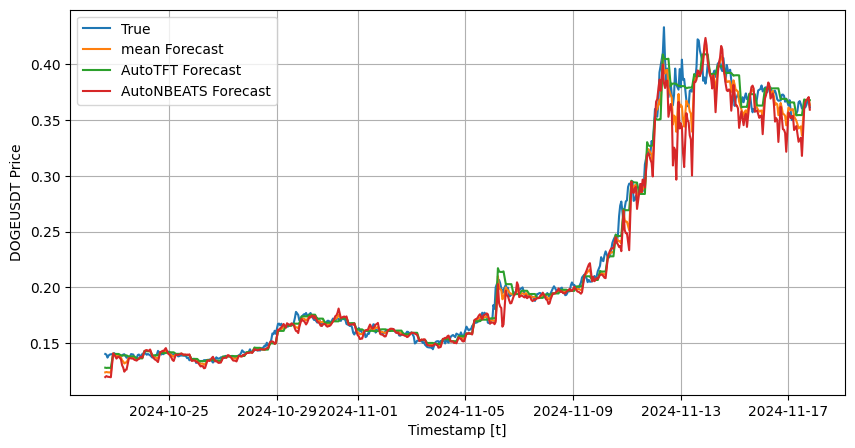

In [11]:
cut_data
for symb,cut in test_pred_insample.groupby('symbol'):
    cut['mean']=cut.filter(like='Auto').mean(axis=1)

    plt.figure(figsize=(10, 5))
    
    plt.plot(cut['ds'], cut['y'], label='True')
    plt.plot(cut['ds'], cut['mean'] ,label='mean Forecast')
    for model in cut.filter(like='Auto').columns:
        plt.plot(cut['ds'], cut[model], label=f'{model} Forecast')
    # plt.plot(cut['ds'], cut['NBEATS'], label='NBEATS Forecast')
    # plt.plot(cut['ds'], cut['BiTCN'], label='BiTCN Forecast')
    # plt.plot(cut['ds'], cut['TFT'], label='TFT Forecast')
    # plt.axvline(cut['ds'].iloc[-12], color='black', linestyle='--', label='Train-Test Split')
    plt.xlabel('Timestamp [t]')
    plt.ylabel(f'{symb} Price')
    plt.grid()
    plt.legend()

In [12]:
# StatsForecast.plot(test_pred_insample, engine='matplotlib',time_col='ds',id_col=id_col, max_insample_length=horizon,)
# StatsForecast.plot(test_pred_insample, engine='matplotlib',time_col='ds',id_col=id_col,target_col='AutoNBEATS', max_insample_length=horizon,)
